In [1]:
#%matplotlib inline
import numpy as np
import pandas as pa
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
import csv
import glob, os
import re
from scipy.stats import uniform
import math
plt.style.use('seaborn') 


In [2]:
no_of_measurements = 3000000
no_of_partitions = 30

temp = no_of_measurements//no_of_partitions*0.33
#print(no_of_servers_test)
#print (int(math.ceil(no_of_servers_test/5000)*5000))

no_of_servers = int(math.ceil(temp/5000)*5000)
no_of_racks = no_of_servers
no_of_centers = no_of_racks//2
no_of_city = no_of_centers
no_of_components = 4

multi = 1

print(temp)
print (no_of_servers)
print (measurements)


#Prelim dataset
#no_of_measurements = 200000
#no_of_partitions = 20
#no_of_racks = 10000
#no_of_racks = no_of_servers
#no_of_centers = no_of_racks//2
#no_of_city = no_of_centers
#no_of_components = 4

33000.0
35000


NameError: name 'measurements' is not defined

In [3]:
#Testing some new stuff here
def move_distribution(total,no_of_partitions):
    i=0
    strides_up = np.geomspace(60,105,no_of_partitions/2)
    strides_down = np.flip(strides_up-1)
    strides= np.append(strides_up,strides_down)
    partitions = np.ones((no_of_partitions,total//no_of_partitions))
    for partition in partitions:
        partition*=np.random.normal(strides[i],3,len(partition))
        i +=1
    return partitions.flatten()#Output 1d array. 

move_distribution(100000,20)

array([61.89342515, 61.75619175, 60.06561907, ..., 53.94980034,
       56.42344903, 56.11560031])

In [4]:
#Functions to create the datasets

def move_distribution(total,no_of_partitions):
    i=0
    strides_up = np.geomspace(60,105,no_of_partitions/2)
    strides_down = np.flip(strides_up-1)
    strides= np.append(strides_up,strides_down)
    partitions = np.ones((no_of_partitions,total//no_of_partitions))
    for partition in partitions:
        partition*=np.random.normal(strides[i],3,len(partition))
        i +=1
    return partitions.flatten()#Output 1d array. 

def create_measurement (multiplier):
    msm_id = np.arange(no_of_measurements*multiplier)+1 #Shifting to first id beeing 1
    msm_datetime = np.round(np.linspace(start=1546300800,stop=1546300800+(no_of_measurements*multiplier/100),num=no_of_measurements*multiplier),1) 
    #tran_from_acc_id = np.floor((np.random.beta(2,8,size=no_of_transactions*multiplier)*no_of_accounts*multiplier)+1) #Shifting to match the account id's
    #tran_from_acc_id_2 = np.floor((np.random.beta(6,8,size=no_of_transactions*multiplier//2)*no_of_accounts*multiplier)+1) #Shifting to match the account id's
    #tran_from_acc = np.append(tran_from_acc_id_1,tran_from_acc_id_2)
    #tran_to_acc_id = np.floor((np.random.beta(8,2,size=no_of_transactions*multiplier)*no_of_accounts*multiplier)+1) #Shifting to match the account id's
    msm_value = np.round(move_distribution(no_of_measurements,no_of_partitions),4)#(np.random.normal(30,5,no_of_measurements*multiplier),4)
    #msm_value = np.round(np.random.beta(40,1,size=no_of_measurements*multiplier)*100,2)
    #tran_amount = np.floor((np.random.beta(2,8,size=no_of_transactions*multiplier)*4)+1) #Shifting to avoid transactions with 0 amount
    msm_component_id = np.random.randint(1,no_of_components+1,no_of_measurements)
    msm_serv_id = np.random.randint(1,no_of_servers+1,no_of_measurements)
    #tran_prod_id = np.floor((np.random.beta(4,6,size=no_of_transactions*multiplier)*no_of_products*multiplier)+1) #Shifting to match the department id's
    
    df = pa.DataFrame({
   'msm_id':msm_id, 
    'msm_datetime':msm_datetime,
    'msm_value':msm_value,
    'msm_component_id':msm_component_id,
    'msm_serv_id':msm_serv_id
    })  
    df = df.astype({'msm_id':int,'msm_datetime':float,'msm_value':float,'msm_component_id':int,'msm_serv_id':int})
    return df
    

def create_server(multiplier):
    serv_id = np.arange(no_of_servers*multiplier)+1
    serv_rack_id = np.random.randint(1,no_of_racks+1,no_of_servers)
    df = pa.DataFrame({
        'serv_id':serv_id,
        'serv_rack_id':serv_rack_id
    })
    df = df.astype({'serv_id':int,'serv_rack_id':int})
    return df


def create_rack(multiplier):
    rack_id = np.arange(no_of_racks*multiplier)+1
    rack_cent_id = np.random.randint(1,no_of_centers+1,no_of_racks)
    df = pa.DataFrame({
        'rack_id':rack_id,
        'rack_cent_id':rack_cent_id
    })
    df = df.astype({'rack_id':int,'rack_cent_id':int})

    return df

def create_center(multiplier):
    cent_id = np.arange(no_of_centers*multiplier)+1
    cent_city_id = np.random.randint(1,no_of_city+1,no_of_centers)
    df = pa.DataFrame({
        'cent_id':cent_id,
        'cent_city_id':cent_city_id
    })
    df = df.astype({'cent_id':int,'cent_city_id':int})

    return df

def create_city(multiplier):
    city_id = np.arange(no_of_city*multiplier)+1
    city_name = np.random.randint(1,4,no_of_city*multiplier)
    df = pa.DataFrame({
        'city_id':city_id,
        'city_name':city_name
    })
    df = df.astype({'city_id':int,'city_name':int})
    return df

def create_component(multiplier):
    component_id = np.arange(no_of_components*multiplier)+1
    component_name = np.flip(component_id)
    df = pa.DataFrame({
        'component_id':component_id,
        'component_name':component_name
    })
    df = df.astype({'component_id':int,'component_name':int})
    return df

#Wrapping function for creation of the dataset
def create_dataset(multi=1):
    msm_df = create_measurement(multi)
    server_df = create_server(multi)
    rack_df = create_rack(multi)
    center_df = create_center(multi)
    city_df = create_city(multi)
    component_df = create_component(multi)
    return msm_df,server_df,rack_df,center_df,city_df,component_df

    

In [5]:
#Clean dataset directory first
dataset_paths = 'datasets/*'
files = glob.glob(dataset_paths)
for file in files:
    os.remove(file)

    
#Create dataset files    
msm_df,server_df,rack_df,center_df,city_df,component_df = create_dataset(1)


# Creating the inserting sql for measurements dataset. 
msm_df['insert_string']='insert into measurement (msm_datetime,msm_value,msm_component_id,msm_serv_id) values(from_unixtime('+msm_df['msm_datetime'].map(str)+'), '+msm_df['msm_value'].map(str)+','+msm_df['msm_component_id'].map(str)+','+msm_df['msm_serv_id'].map(str)+');'
msm_df['insert_delete_string']= 'insert into measurement (msm_datetime,msm_value,msm_component_id,msm_serv_id) values(from_unixtime('+msm_df['msm_datetime'].map(str)+'), '+msm_df['msm_value'].map(str)+','+msm_df['msm_component_id'].map(str)+','+msm_df['msm_serv_id'].map(str)+'); DELETE FROM measurement LIMIT 1;'

#Dividing the measurement datasets into several files. 
partition_length = len(msm_df.index)//no_of_partitions
msm_df['insert_string'][:partition_length].to_csv('datasets/unformatted_measurement_0.sql',index=False,header=False)
for i in range(1,no_of_partitions+1):
    file_name = 'unformatted_measurement_{}.sql'.format(i)
    msm_df['insert_delete_string'][(i)*partition_length:partition_length*(i+1)].to_csv('datasets/'+file_name,index=False,header=False)

    
#Formatting the measurement.sql files to ready them for import. 
unformatted_measurement_files = sorted(glob.glob(dataset_paths))
for file in unformatted_measurement_files:
    output_file_name=re.sub('^datasets/unformatted_','datasets/',file)
    with open(file, 'r') as f, open(output_file_name, 'w+') as fo:
      #  fo.write("set autocommit = 0;")
        for line in f:
            fo.write(line.replace('"', '').replace("'", "")) 
       # fo.write("COMMIT;")
    os.remove(file)
    
#Adding in the rest of the dataset as csv files. 
server_df.to_csv('datasets/server.csv',index=False)
rack_df.to_csv('datasets/rack.csv',index=False)
center_df.to_csv('datasets/center.csv',index=False)
city_df.to_csv('datasets/city.csv',index=False)
component_df.to_csv('datasets/component.csv',index=False)

#Creating a copy of the data in the required file location to load into mysql. 
! cp datasets/* /home/svestrhe/Documents/Forprosjekt/code/mysql-server/mysql-test/std_data/

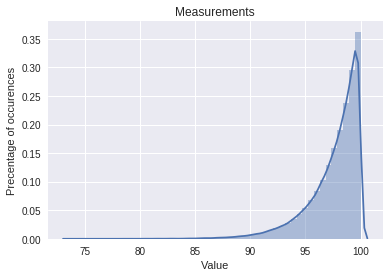

In [8]:
#ax=sns.distplot(msm_df['msm_value'])
#ax.set_xlabel("Value")
#ax.set_ylabel("Precentage of occurences")
#plt.title('Measurements')
#Prelim_test_ds = plt.gcf()
#Prelim_test_ds.savefig("/export/home/tmp/Dropbox/Apper/ShareLaTeX/Master/plots/prelim/Prelim_test_ds.png",dpi=360)

#plt.show()

#sns.distplot(msm_df['msm_serv_id'])
#plt.title('Measurements_server_id')
#plt.show()

#no_of_depts=5000
#no_of_locations=5000
#no_of_emps=20000
#dept_df = create_dept(1)
#sns.distplot(dept_df['dept_name'])
#plt.title('Department')
#plt.show()

#daa_list = [msm_df[:95000]["msm_value"],msm_df[93000:97000]["msm_value"]]
#sns.lineplot(data=msm_df["msm_value"])
#line=sns.lineplot(x="msm_datetime", y="msm_value",data=msm_df[99000:])
#plt.show()

#daa_list = [msm_df[:95000]["msm_value"],msm_df[93000:97000]["msm_value"]]
#sns.lineplot(data=msm_df["msm_value"][:50000])
#line=sns.lineplot(x="msm_datetime", y="msm_value",data=msm_df[99000:])
#plt.show()

#sns.distplot(msm_df["msm_value"])
#plt.show()

#sns.distplot(msm_df["msm_value"][:50000])
#plt.show()

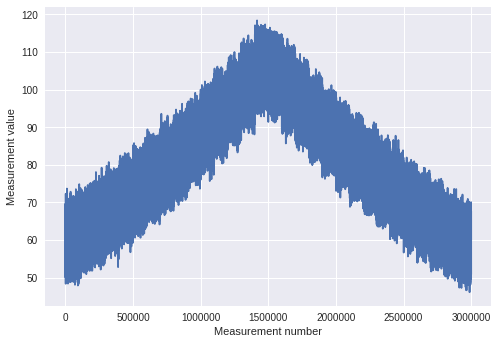

In [13]:
#Show graphs of the distributions we want to look at. 
#plt.xlim(0,len(tran_df.index))
#sns.distplot(msm_df['msm_value'][:5000])
#plt.title('Measurements')
#plt.show()

#sns.distplot(msm_df['msm_value'][5000:10000])
#plt.title('Measurements')
#plt.show()

#sns.distplot(msm_df['msm_value'][:2000])
#plt.title('Measurements')
#plt.show()

#sns.distplot(msm_df['msm_value'][2000:4000])
#plt.title('Measurements')
#plt.show()




#daa_list = [msm_df[:95000]["msm_value"],msm_df[93000:97000]["msm_value"]]
#sns.lineplot(data=msm_df["msm_value"])
#line=sns.lineplot(x="msm_datetime", y="msm_value",data=msm_df[99000:])
#plt.show()

ax=sns.lineplot(x="msm_id", y="msm_value",data=msm_df)
plt.title("")
ax.set_xlabel("Measurement number")
ax.set_ylabel("Measurement value")
#plt.axvline(x=0)
#plt.axvline(x=-2,ymax=0.25)
#plt.axvline(x=2,ymax=0.25)
msm_dist_plt = plt.gcf()
msm_dist_plt.savefig("/export/home/tmp/Dropbox/Apper/ShareLaTeX/Master/plots/msm_distribution_plt.png",dpi=360)
plt.show()




In [13]:
def create_dept (multiplier):
    dept_id = np.arange(no_of_depts*multiplier) +1 #Shifting to first id beeing 1
    #dept_name = np.random.randint(50,size=no_of_depts)
    #dept_location = np.random.randint(50,size=no_of_depts)
    #dept_name = np.random.chisquare(3,size=no_of_depts*multiplier)+1
    dept_name = np.floor(np.random.beta(1,160,size=no_of_depts*multiplier)*no_of_depts*multiplier)
    dept_location = np.random.randint(no_of_locations*multiplier,size=no_of_depts*multiplier)+1
    dept_manager = np.random.randint(no_of_emps*multiplier,size=no_of_depts*multiplier) +1 #Can't have 0, there is no emp id = 0. 
    df= pa.DataFrame({
    'dept_id':dept_id, 
    'dept_name':dept_name,
    'dept_location':dept_location,
    'dept_manager':dept_manager
    })
    df = df.astype({'dept_id':int,'dept_name':int,'dept_location':int,'dept_manager':int})
    return df

In [57]:
def create_location(multiplier):
    location_id=np.arange(no_of_locations*multiplier) +1 #shifting to first id being 1
    location_name=dept_name = np.round(np.random.beta(2,8,size=no_of_locations*multiplier)*no_of_locations*multiplier,0)
    location_country_id = np.floor(np.random.beta(2,8,size=no_of_locations*multiplier)*no_of_countries*multiplier)+1 #Shifting to match the department id's
    df= pa.DataFrame({
    'location_id':location_id, 
    'location_name':location_name,
    'location_country_id':location_country_id
    })
    df = df.astype ({'location_id':int,'location_name':int,'location_country_id':int})
    return df

In [58]:
def create_country(multiplier):
    country_id=np.arange(no_of_countries*multiplier)+1
    country_name=np.floor((np.random.beta(2,8,size=no_of_countries*multiplier)*no_of_countries*multiplier)+1) #Shifting to match the department id's

    df=pa.DataFrame({
        'country_id':country_id,
        'country_name':country_name
    })
    df = df.astype({'country_id':int,'country_name':int})
    return df

In [59]:
#Wrapping function for creation of the dataset
def create_dataset(multi=1):
    emp_df = create_emp(multi)
    dept_df = create_dept(multi)
    loc_df = create_location(multi)
    country_df = create_country(multi)
    return emp_df,dept_df,loc_df,country_df

In [60]:
#Lets create a run of our dataset and show the distributions we want to look at. 

emp_df,dept_df,loc_df,country_df = create_dataset() 
emp_df_2,dept_df_2,loc_df_2,country_df_2 = create_dataset(2) 
emp_df_4,dept_df_4,loc_df_4,country_df_4 = create_dataset(4) 
emp_df_6,dept_df_6,loc_df_6,country_df_6 = create_dataset(6) 
emp_df_8,dept_df_8,loc_df_8,country_df_8 = create_dataset(8) 

In [61]:
#Write the datasets to the csv files. 
emp_df.to_csv('../code/mysql-server/mysql-test/std_data/employee.csv',index=False)
dept_df.to_csv('../code/mysql-server/mysql-test/std_data/department.csv',index=False)
loc_df.to_csv('../code/mysql-server/mysql-test/std_data/location.csv',index=False)
country_df.to_csv('../code/mysql-server/mysql-test/std_data/country.csv',index=False)

emp_df.to_csv('employee.csv',index=False)
dept_df.to_csv('department.csv',index=False)
loc_df.to_csv('location.csv',index=False)
country_df.to_csv('country.csv',index=False)

emp_df_2.to_csv('../code/mysql-server/mysql-test/std_data/employee_2.csv',index=False)
dept_df_2.to_csv('../code/mysql-server/mysql-test/std_data/department_2.csv',index=False)
loc_df_2.to_csv('../code/mysql-server/mysql-test/std_data/location_2.csv',index=False)
country_df_2.to_csv('../code/mysql-server/mysql-test/std_data/country_2.csv',index=False)

emp_df_2.to_csv('employee_2.csv',index=False)
dept_df_2.to_csv('department_2.csv',index=False)
loc_df_2.to_csv('location_2.csv',index=False)
country_df_2.to_csv('country_2.csv',index=False)

emp_df_4.to_csv('../code/mysql-server/mysql-test/std_data/employee_4.csv',index=False)
dept_df_4.to_csv('../code/mysql-server/mysql-test/std_data/department_4.csv',index=False)
loc_df_4.to_csv('../code/mysql-server/mysql-test/std_data/location_4.csv',index=False)
country_df_4.to_csv('../code/mysql-server/mysql-test/std_data/country_4.csv',index=False)

emp_df_4.to_csv('employee_4.csv',index=False)
dept_df_4.to_csv('department_4.csv',index=False)
loc_df_4.to_csv('location_4.csv',index=False)
country_df_4.to_csv('country_4.csv',index=False)

emp_df_6.to_csv('../code/mysql-server/mysql-test/std_data/employee_6.csv',index=False)
dept_df_6.to_csv('../code/mysql-server/mysql-test/std_data/department_6.csv',index=False)
loc_df_6.to_csv('../code/mysql-server/mysql-test/std_data/location_6.csv',index=False)
country_df_6.to_csv('../code/mysql-server/mysql-test/std_data/country_6.csv',index=False)

emp_df_6.to_csv('employee_6.csv',index=False)
dept_df_6.to_csv('department_6.csv',index=False)
loc_df_6.to_csv('location_6.csv',index=False)
country_df_6.to_csv('country_6.csv',index=False)

emp_df_8.to_csv('../code/mysql-server/mysql-test/std_data/employee_8.csv',index=False)
dept_df_8.to_csv('../code/mysql-server/mysql-test/std_data/department_8.csv',index=False)
loc_df_8.to_csv('../code/mysql-server/mysql-test/std_data/location_8.csv',index=False)
country_df_8.to_csv('../code/mysql-server/mysql-test/std_data/country_8.csv',index=False)

emp_df_8.to_csv('employee_8.csv',index=False)
dept_df_8.to_csv('department_8.csv',index=False)
loc_df_8.to_csv('location_8.csv',index=False)
country_df_8.to_csv('country_8.csv',index=False)

!sh run_tests.sh


#emp_dfx2.to_csv('../code/mysql-server/mysql-test/std_data/same_dist_employee.csv',index=False)
#dept_dfx2.to_csv('../code/mysql-server/mysql-test/std_data/same_dist_dept.csv',index=False)

[3/3] cd /export/home/tmp/bygging && /.../mysql-server/cmake/do_abi_check.cmake
Logging: /home/svestrhe/Documents/Forprosjekt/code/mysql-server/mysql-test/mysql-test-run.pl  --nocheck-testcase --suite=histogram_plugin --record execute_timing --mem --testcase-timeout=300 --suite-timeout=300 --mysqld=--plugin_dir=/export/home/tmp/bygging/plugin_output_directory/
MySQL Version 8.0.15
Checking supported features
 - Binaries are debug compiled
Checking leftover processes
Removing old var directory
Creating var directory '/export/home/tmp/bygging/mysql-test/var'
 - symlinking 'var' to '/dev/shm/var_auto_FAaL'
Installing system database
Using parallel: 1

                  TEST NAME                       RESULT  TIME (ms) COMMENT
------------------------------------------------------------------------------
worker[1] Test still running: histogram_plugin.execute_timing
worker[1] Test still running: histogram_plugin.execute_timing
worker[1] Test still running: histogram_plugin.execute_timing
[1

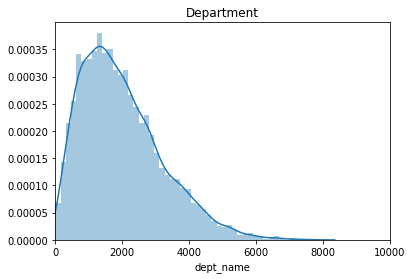

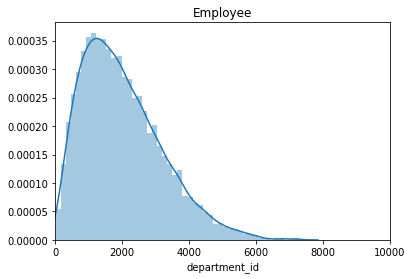

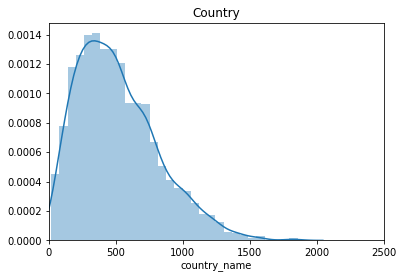

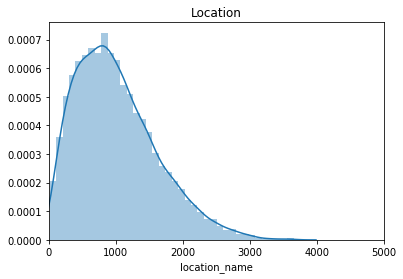

In [49]:
#Show graphs of the distributions we want to look at. 
plt.xlim(0,len(dept_df.index))
sns.distplot(dept_df['dept_name'])
plt.title('Department')
plt.show()

plt.xlim(0, len(dept_df.index))
sns.distplot(emp_df['department_id'])
plt.title('Employee')
plt.show()

plt.xlim(0,len(country_df.index))
sns.distplot(country_df['country_name'])
plt.title('Country')
plt.show()

plt.xlim(0,len(loc_df.index))
sns.distplot(loc_df['location_name'])
plt.title('Location')
plt.show()

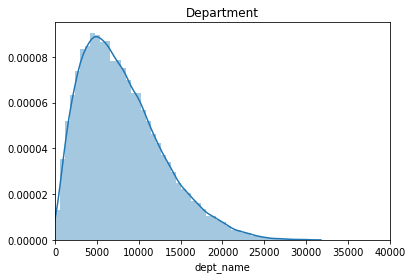

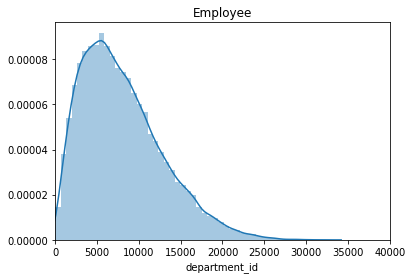

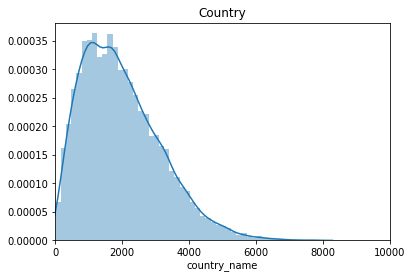

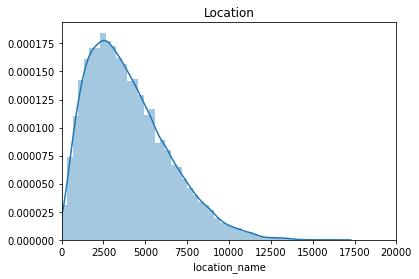

In [50]:
#Show graphs of the distributions we want to look at. 
plt.xlim(0,len(dept_df_4.index))
sns.distplot(dept_df_4['dept_name'])
plt.title('Department')
plt.show()

plt.xlim(0, len(dept_df_4.index))
sns.distplot(emp_df_4['department_id'])
plt.title('Employee')
plt.show()

plt.xlim(0,len(country_df_4.index))
sns.distplot(country_df_4['country_name'])
plt.title('Country')
plt.show()

plt.xlim(0,len(loc_df_4.index))
sns.distplot(loc_df_4['location_name'])
plt.title('Location')
plt.show()